In [13]:
import csv
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Load dataset from CSV
dataset_file = "clean2.data.csv"  # Update with the path to your combined CSV file
file_dataset = open(dataset_file, mode='r')
csvreader_dataset = csv.reader(file_dataset)
next(csvreader_dataset)  # Skip headers

# Initialize lists to store training and test data
train_data = []
test_data = []

# Read data from CSV and separate into training and test data
for i, row in enumerate(csvreader_dataset):
    if i < 3600:
        train_data.append(row)
    else:
        test_data.append(row)

# Close CSV file
file_dataset.close()

# Convert lists to numpy arrays
train_data = np.array(train_data)
test_data = np.array(test_data)

# Separate features and labels for training data
X_train = train_data[:, 2:-1].astype(float)  # Assuming features start from column index 2 and end before the last column
y_train = train_data[:, -1]
rIndex = np.random.permutation(len(train_data))
X_train = X_train[rIndex]
y_train = y_train[rIndex]
y_train = np.where(y_train=="1.", 1, -1)

# Separate features and labels for test data
X_test = test_data[:, 2:-1].astype(float)
y_test = test_data[:, -1]
y_test = np.where(y_test=="1.", 1, -1) 


# Display shapes of datasets
print("Shape of training data (X_train):", X_train.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing data (X_test):", X_test.shape)
print("Shape of testing labels (y_test):", y_test.shape)


Shape of training data (X_train): (3600, 166)
Shape of training labels (y_train): (3600,)
Shape of testing data (X_test): (2997, 166)
Shape of testing labels (y_test): (2997,)


In [8]:
print(y_train)
print(y_test)

[ 1 -1  1 ... -1  1 -1]
[-1 -1 -1 ... -1 -1 -1]


In [9]:
# Define PercentCorrect function
def PercentCorrect(inputs, targets, weights):
    N = len(targets)
    targets = targets.astype(np.float64)
    nCorrect = 0
    for n in range(N):
        oneInput = inputs[n, :]
        if(targets[n] * np.dot(oneInput, weights) > 0):
            nCorrect += 1
    return 100 * nCorrect / N

In [29]:
# Randomly initialize weights
w = np.random.randn(X_train.shape[1])
print("Randomly generated weight vector (w):", w)

# Print initial percentage correct
print("Initial Percentage Correct: %6.2f" % (PercentCorrect(X_train, y_train, w)))

# Set parameters for training
MaxIter = 15000
alpha = 0.0001
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)

# Training loop
Ntrain = X_train.shape[0]
Ntest = X_test.shape[0]

for iter in range(MaxIter):
    r = np.floor(np.random.rand() * Ntrain).astype(int)
    x = X_train[r, :]

    if y_train[r] * np.dot(x, w) < 0:
        w += alpha * y_train[r] * x

    P_train[iter] = PercentCorrect(X_train, y_train, w)
    P_test[iter] = PercentCorrect(X_test, y_test, w)

# Print percentage correct after training
print("Percentage Correct After Training: %6.2f %6.2f" % (PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))


Randomly generated weight vector (w): [-0.01949366  0.60264986  0.85618637  1.037157    0.2474627  -0.87801402
  1.73504693  0.36349837 -0.78713165 -0.38681619  1.10366488  0.5160444
 -0.62295646 -0.31408704  0.22586719 -1.10217237  0.23841417  1.11764085
 -1.07384237 -1.78022642 -0.45861209 -0.82050155 -1.02937692  0.86905602
  0.99554277 -1.02254319 -0.10720709 -0.70325854  0.35999456 -0.49667336
 -1.22209105 -1.54335329  1.23153482 -0.33824415 -1.75707656  1.46587992
 -0.28917531  0.84082139  0.01063964 -0.21567845  1.70689177 -0.0220908
 -0.75384213 -2.56324188 -2.52374802 -0.94633366 -0.00452469  1.34331074
 -0.00549644 -0.42275182  0.69887577  0.15147643 -0.89543319  0.41656226
  0.37523432 -0.05641553  0.16767105 -0.85279422 -1.37368726 -0.46447798
  0.15620866  0.464008    0.55475566  0.97655153 -0.38667364 -0.10553956
 -0.02952047 -1.52507495 -0.20739321  1.01636569 -0.6125979   1.30945632
  0.87400024 -0.39821981  0.56974555  1.12300441 -0.10641454  0.22295802
 -1.39509729  0

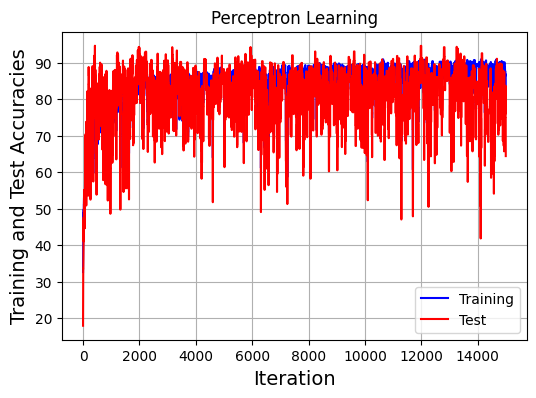

In [28]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, "b", label = "Training")
ax.plot(range(MaxIter), P_test, "r", label = "Test")
ax.grid(True)
ax.legend()
ax.set_title("Perceptron Learning")
ax.set_ylabel("Training and Test Accuracies", fontsize=14)
ax.set_xlabel("Iteration", fontsize=14)
plt.savefig("learningCurves.png")